In [52]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using StatsBase

### SBM with planted score

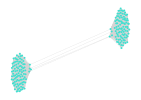

In [89]:
rng = Random.default_rng();
n = 200

planted_score = randperm(rng,n)
eta = 0.1
noise = 0.2
p_in = 0.8
p_out = 0.001
meta_g = ero_mun_sbm(rng,n,p_in,p_out,eta,noise;planted_score)

B = magnetic_incidence(meta_g)
Lap = B * B';

gplot(meta_g)

### Exact magnetic Laplacian

0.9750753768844221


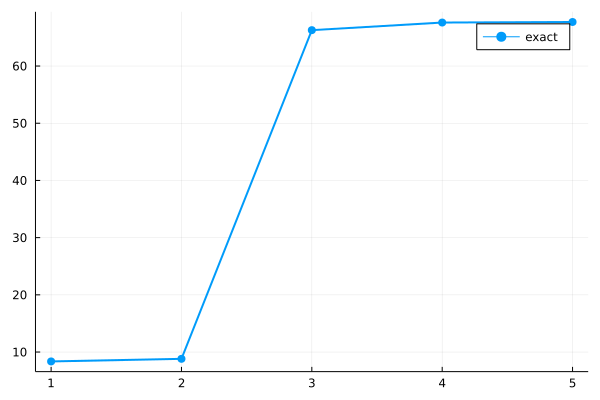

In [107]:
q = 0
lev = leverage_score(B, q)
exact_eigenvalues = eigvals(Lap);
method = "exact"
x = 1:5
y = exact_eigenvalues[x] #.- exact_eigenvalues[1]

ranking_full = syncrank(Lap, meta_g; singular=true)
planted_ranking = ranking_from_score(planted_score)

tau_full = corkendall(planted_ranking, ranking_full)

println(tau_full)
plot(
    x,
    y;
    markerstrokecolor=:auto,
    labels=method,
    markershape=:circle,
    markersize=5,
    linewidth=2,
    markerstrokewidth=2,
)

In [113]:
exact_eigenvalues[end] / exact_eigenvalues[1]

11.163417194388318

0.9750753768844221


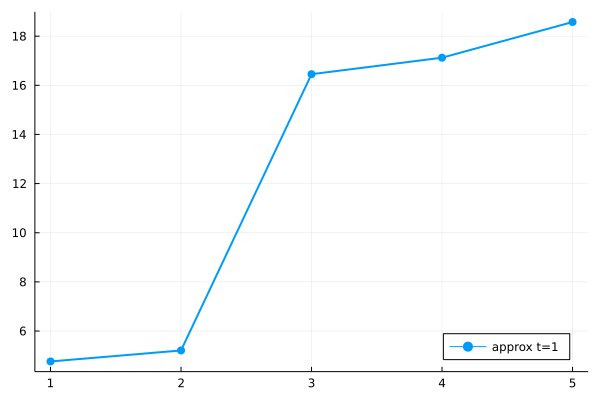

In [116]:
weighted = false
t = 1
vec = @timed average_sparsifier(rng, meta_g, lev, q, t; weighted)
out = vec[1]
L_av = out[1]
n_cls = out[2]
n_rts = out[3]
time = vec[2]

# preconditioning

L_av = (L_av + L_av') / 2
R = cholesky(L_av).L
Lap_shifted = Lap - exact_eigenvalues[1] * I
pcd_Lap = R \ (Lap_shifted / R')

# L_av = (L_av + L_av') / 2
# Lap_shifted = Lap - exact_eigenvalues[1] * I
# pcd_Lap = L_av \ Lap_shifted 
# pcd_eigenvalues = real.(eigvals(pcd_Lap))

method = "approx t=" * string(t)
x = 1:5
y = real.(pcd_eigenvalues[x])

singular = true
v = (R') \ least_eigenvector(pcd_Lap; singular)

score = angular_score(v)
p = ranking_from_score(score)
ranking_pcd = best_shift(p, meta_g)

tau_pcd = corkendall(planted_ranking, ranking_pcd)
println(tau_pcd)

legendposition = :bottomright

plot(
    x,
    y;
    markerstrokecolor=:auto,
    labels=method,
    markershape=:circle,
    markersize=5,
    linewidth=2,
    markerstrokewidth=2,
    legend=legendposition
)

In [117]:
pcd_eigenvalues = eigvals(L_av)
pcd_eigenvalues[end] / pcd_eigenvalues[1]

6677.037522753631

#### ERO



In [30]:
n = 100
p = 0.9
eta = 0.1

scaling = 1
# planted ranking score
planted_score = randperm(rng,n)

# graph model
type = "MUN" 

if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score,scaling)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score,scaling)
end

B = magnetic_incidence(meta_g)

weighted = false

W = I # weight matrix
if weighted
    e_weights = get_edges_prop(meta_g, :e_weight, true, 1.0)
    W *= diagm(e_weights)
end
L = B * W * B'

# leverage scores
q = 0
lev = leverage_score(B, q; W)

n_batch = 10
rangebatch = 1:n_batch

for t = 

method = "DPP LS"
L_av, n_cles, n_rts, weights = average_sparsifier(
    rng, meta_g, lev, q, t; weighted
)

lambda = eigvals(L)

sp_lambda = eigvals(L_av)
sp_lambda[1]



100-element Vector{ComplexF64}:
 0.24813567740658815 - 3.6858353255551956e-15im
    80.9488695433668 + 4.4976926409500333e-17im
   81.61333943418205 + 2.5807366343335684e-15im
   82.47543644737348 - 1.1675822654019216e-14im
   82.66114861502328 - 1.3202637880905527e-16im
   83.11045748925798 - 5.759272990746559e-19im
   83.30168859277958 + 2.188326107560221e-15im
   83.42811005452913 - 4.9590933779168724e-15im
   83.71256035823286 + 2.259170083787258e-16im
   84.02496454133787 - 2.283053090478588e-16im
                     ⋮
   95.49096376018679 - 6.921250903331268e-16im
   95.58837059195405 - 1.0561155533149197e-14im
   95.81478719529082 + 1.8870909115725042e-16im
   96.03824615713071 - 1.0272766796043065e-14im
   96.15763000411032 + 7.138795947273885e-15im
   96.19826844256262 + 1.3117352507487126e-15im
   96.46016153469425 + 2.876708432731914e-15im
   96.65934651706742 + 1.9521511167610035e-14im
   97.61494413066507 + 3.572553568014762e-15im

In [55]:
n = 100
p = 0.9
eta = 0.1

rng = Random.default_rng();


scaling = 1
# planted ranking score
planted_score = randperm(rng,n)

# graph model
type = "MUN" 

if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score,scaling)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score,scaling)
end

n_batch = 12
n_rep = 10
D_all = eigenvalue_approx(meta_g, n_batch, n_rep, rng)

Dict{Any, Any} with 2 entries:
  "DPP unif" => Dict{String, Any}("weight"=>[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,…
  "DPP LS"   => Dict{String, Any}("weight"=>[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,…

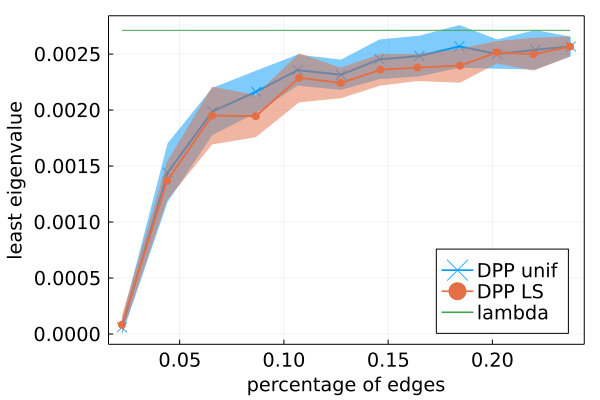

In [56]:
using Measures

metric = "lambda_sp"
metric_std = metric * "_std"

legendposition = :bottomright

method = "DPP unif"
D = D_all[method]
x = D["percent_edges"]
y = D[metric]
y_er = D[metric_std]

Plots.plot(
    x,
    y;
    ribbon=y_er,
    labels=method,
    markerstrokecolor=:auto,
    markershape=:xcross,
    markersize=5,
    linewidth=2,
    markerstrokewidth=2,
    xtickfont=font(13),
    ytickfont=font(13),
    guidefont=font(13),
    legendfont=font(13),
    framestyle=:box,
    margins=0.1 * 2cm,
)

method = "DPP LS"
D = D_all[method]
x = D["percent_edges"]
y = D[metric]
y_er = D[metric_std]

Plots.plot!(
    x,
    y;
    ribbon=y_er,
    labels=method,
    markerstrokecolor=:auto,
    markershape=:circle,
    markersize=5,
    linewidth=2,
    markerstrokewidth=2,
    legend=legendposition,
)

x = D["percent_edges"]
y = real(D["lambda"]) * ones(size(x))
Plots.plot!(x, y; labels="lambda")
ylabel!("least eigenvalue")

xlabel!("percentage of edges")


In [32]:
lambda[1]

0.24813567740658815 - 3.6858353255551956e-15im

In [37]:
# n_com = 100
# n = 2*n_com
# noise = 0.1
# η = 0.
# rng = Random.default_rng();

# # planted ranking score
# planted_score = randperm(rng,n)

# meta_g = gen_graph_cliques(rng,n_com,noise,η;planted_score)

{200, 9901} undirected Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)

In [38]:
# incidence matrix
B = magnetic_incidence(meta_g)
B_ust = magnetic_incidence_matrix(meta_g; oriented=true, phases=false)

L = B * B';
lambda = eigvals(L)
lambda = lambda[1:3]
#plot(real(lambda),markershape=:circle)
ratio = lambda[2] / lambda[1]

1.0999745919215576

In [45]:
q = 0
t = 10
weighted = false
L_av, n_cles, n_rts, weights = average_sparsifier(
    rng, meta_g, nothing, q, t; weighted
)
lambda_av = eigvals(L_av)
lambda_av = lambda_av[1:3]
#plot(real(lambda_av),markershape=:circle)
ratio_av= lambda_av[2] / lambda_av[1]

1.4176948216976177 - 9.15396114340304e-15im

In [46]:
l_precond = eigvals(L_av\L)
l_precond = l_precond[1:3]
ratio_precond = l_precond[2] / l_precond[1]
#plot(real(l_precond),markershape=:circle)

1.030177245859586 - 1.3278309489278524e-15im

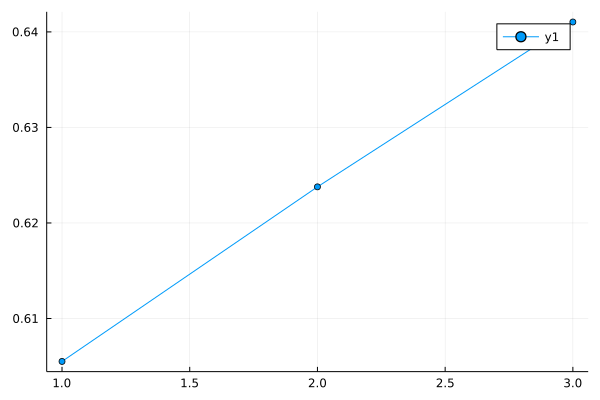

In [47]:
plot(real(l_precond),markershape=:circle)